In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [4]:
heart_disease = pd.read_csv("framingham.csv")

In [5]:
heart_disease.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
heart_disease.shape

(4238, 16)

In [7]:
heart_disease.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
heart_disease['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [9]:
heart_disease.groupby("TenYearCHD").mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [10]:
heart_disease.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
num_cols = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
cat_cols = ['education','BPMeds']

In [12]:
imputer = SimpleImputer(strategy = "median")
heart_disease[num_cols] = imputer.fit_transform(heart_disease[num_cols])

In [13]:
heart_disease.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [14]:
imputer = SimpleImputer(strategy = "most_frequent")
heart_disease[cat_cols] = imputer.fit_transform(heart_disease[cat_cols])

In [15]:
heart_disease.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [16]:
X = heart_disease.drop(columns='TenYearCHD',axis=1)
Y = heart_disease['TenYearCHD']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y,random_state=2)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [20]:
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,training_data_prediction)
print(training_data_accuracy)


0.8545722713864307


In [21]:
training_data_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(Y_test, training_data_prediction)
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8561320754716981


In [23]:
input = (1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0)
input_np = np.asarray(input)
input_reshape = input_np.reshape(1,-1)
std_data = scaler.transform(input_reshape)
prediction = model.predict(std_data)
print(prediction)
if (prediction[0]== 0):
  print('The person is not having a heart disease')
else:
  print('The person is having a heart disease')

[0]
The person is not having a heart disease


/opt/anaconda3/envs/project1/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[Text(0.5, 0.875, 'x[1] <= -0.125\ngini = 0.258\nsamples = 3390\nvalue = [2875, 515]'),
 Text(0.25, 0.625, 'x[10] <= 2.761\ngini = 0.146\nsamples = 1670\nvalue = [1538, 132]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[11] <= 0.58\ngini = 0.141\nsamples = 1661\nvalue = [1534.0, 127.0]'),
 Text(0.0625, 0.125, 'gini = 0.118\nsamples = 1354\nvalue = [1269.0, 85.0]'),
 Text(0.1875, 0.125, 'gini = 0.236\nsamples = 307\nvalue = [265, 42]'),
 Text(0.375, 0.375, 'x[13] <= 1.42\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.3125, 0.125, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.75, 0.625, 'x[10] <= 0.536\ngini = 0.346\nsamples = 1720\nvalue = [1337, 383]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[14] <= 2.641\ngini = 0.287\nsamples = 1099\nvalue = [908, 191]'),
 Text(0.5625, 0.125, 'gini = 0.278\nsamples = 1081\nvalue = [901, 180]'),
 Text(0.6875, 0.125, 'gini = 0.475\nsamples = 18\nvalu

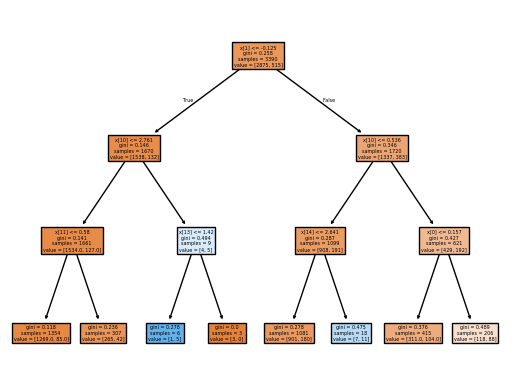

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, Y_train)

tree.plot_tree(model, filled=True)
